In [3]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Tue Dec 04 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [4]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import os
import nolds
import data
import mne
import matplotlib.pyplot as plt

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)

Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


<ipython-input-4-cc1fabbf0faf>:26: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


In [23]:
from lib.nolitsa.nolitsa import delay
from sklearn.decomposition import PCA

maxtau = 50
dim = [2, 4, 6, 8, 10] 

In [ ]:
ild = delay.ild(data[0], dim=dim, maxtau=maxtau)

In [ ]:
plt.title('ILD for CHANNEL 0')
plt.xlabel('Time delay')
plt.ylabel('ILD')

for d, ild in zip(dim, ilds):
    plt.plot(np.arange(1, maxtau+1), ild, label=f'm = {d}')

plt.legend()

plt.show()

[-1.22124533e-15  3.07235494e-02  1.91286821e-02 ... -3.02941084e+00
 -2.52376246e+00 -2.75082803e+00]
Time delay = 4


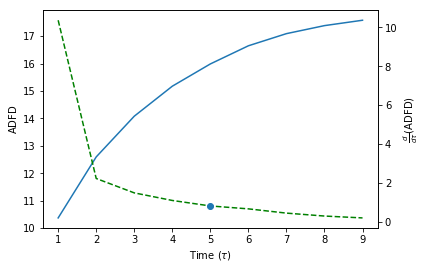

In [22]:
maxtau=10
disp = delay.adfd(10, data[0], maxtau=maxtau)
tau = np.arange(maxtau)
ddisp = np.diff(disp)
forty = np.argmax(ddisp < 0.4 * ddisp[1])

print('Time delay = %d' % forty)

fig, ax1 = plt.subplots()

ax1.set_xlabel(r'Time ($\tau$)')
ax1.set_ylabel(r'$\mathrm{ADFD}$')
ax1.plot(tau[1:], disp[1:])

ax2 = ax1.twinx()
ax2.plot(tau[1:], ddisp, 'g--')
ax2.plot(tau[forty + 1], ddisp[forty], 'o')
ax2.set_ylabel(r'$\frac{d}{d\tau}(\mathrm{ADFD}$)')

plt.show()

In [ ]:
dim = 10
maxtau = 10
pca = PCA(num_components=dim)
yy = [utils.reconstruct(data[0], dim=dim, tau=tau) for tau in np.arange(1, maxtau+1)]
ys = [[pca.fit(y).singular_values_[i] for y in yy] for i in range(dim)]
plt.figure()
plt.xlabel('Time delay')
plt.ylabel('Singular value')
for i, y in enumerate(ys):
    plt.plot(np.arange(1, maxtau+1), y, label=f'm={i+1}')
plt.legend()
plt.show
